# Getting started with the text classification

Problem statement :

Ankit Tomar, who is a Life sciences researcher does Pharmacovigilance (post-market drug safety surveillance) for Pharma Products.

Pharmacovigilance identifies ADRs (adverse drug reactions) after a drug’s release. Comprehensive knowledge of ADRs can reduce the detrimental impact on patient’s health system. Practically, clinical trials cannot investigate all settings in which a drug will be used, making it impossible to fully characterize the drug’s adverse effect profile before its approval. Pharmacovigilance methods continuously analyse frequently updated data sources, Twitter in particularly because of its large user base, demographic variability, and publicly available data.
ADR detection in social media requires automated methods to process the high data volume. It would greatly help her if she is able to automate the segmentation of Tweet into either ADR or NON- ADR, on the basis of Drug, Symptom and Effect mentioned in future.

###### What shall we do?

We shall build a system to classify the Tweet into the 2 segments. We shall be representing our approach and develop the python Code for the same.

###### Evaluation Matrix
Performance will be measured using accuracy matrix and it needs to be 85+ for acceptance of the solution. 

#### Data Source:
Attached data set (data.csv) has tweets labelled as ADR and NON-ADR. The file has information which contains column like user IDs, tweet IDs, and label along with the tweet.


Assumptions
1. In this particular case, Classification is not happening on real time tweets. Since Dataset is very specific. 
2. In case, we want to have real time analysis on twitter, we can use Twitter APIs - tweepy (This is excluded from the solution as we have csv dataset)

#### Approach 
It is a binary classification problem where we need to automate the tweet data classification - ADR or Non-ADR
1. Import the data 
2. Understand the data and start EDA process
3. Work on Tweet Column 
    - Change the text to lower case
    - Remove the punctuations
    - Remove the stopwords from the tweets by using stopwords from nltk
    - Tokenize the twitter data
    - Lemmatize for stemming of the data
    - Split the data into training and testing 
    - Feature engineering using TF-IDF 
    
4. Build baseline model and validate the accuracy by classification and confusion matrix
  Logistic Regression-  Accuracy:  0.8520408163265306

5. Try multiple algorithms to look for the good accuracy
        Naive Bayes Accuracy Score ->  83.26955782312925
        SDG Accuracy Score             0.7329931972789115
        Randome forest                 0.8775510204081632

    So we go with Random forest as an algo for this model. 
 
#### Next steps: 
1. Automation 
2. Save the model 
3. Deploy 

Hints: 

  - Use twitter API keys to automate the process
  - We can do hyperparater tunning with K-Fold cross validation and many more to improve the accuracy 
  - Use Pickel library to load the model
  - Use flask for API creation 
  - Deploy it to any cloud platform - Azure/GCP/AWS SageMaker etc.

## Python Code

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import string
import nltk 

In [2]:
#import metrics library
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
# Load the data set 
df = pd.read_csv("Data.csv")
df.head()

,UserId,TweetId,Tweet,ADR_label
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1


In [4]:
# let us quickly validate the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23516 entries, 0 to 23515
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   UserId     23516 non-null  int64 
 1   TweetId    23516 non-null  int64 
 2   Tweet      23516 non-null  object
 3   ADR_label  23516 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 735.0+ KB


In [5]:
# Check if any observation is null/ empty in tweet colum
df['Tweet'].isnull().sum().sum()

0

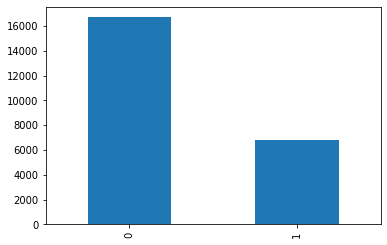

In [6]:
# Visualize the target value how the values are distributed 
import matplotlib.pyplot as plt
(df['ADR_label']).value_counts()
(df['ADR_label']).value_counts().plot(kind = 'bar')

Text processing: It is not extensive list of processing, This is very basic. I will introduce advance techniques in upcoming projects. This is only for beginners. 

In [7]:
# Change Tweet column data to the lower case 
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x.lower()
for x in x.split()))
df['Tweet']

0            intravenous azithromycin-induced ototoxicity.
1        immobilization, while paget's bone disease was...
2        unaccountable severe hypercalcemia in a patien...
3        methods: we report two cases of pseudoporphyri...
4        methods: we report two cases of pseudoporphyri...
                               ...                        
23511    at autopsy, the liver was found to be small, s...
23512    physical exam revealed a patient with aphasia,...
23513    at the time when the leukemia appeared seven o...
23514    the american society for regional anesthesia a...
23515    concomitant administration of estradiol result...
Name: Tweet, Length: 23516, dtype: object

In [8]:
# Remove the punctactaion 
df['Tweet'] = df['Tweet'].str.replace('[^\w\s]',"")
df['Tweet']

0              intravenous azithromycininduced ototoxicity
1        immobilization while pagets bone disease was p...
2        unaccountable severe hypercalcemia in a patien...
3        methods we report two cases of pseudoporphyria...
4        methods we report two cases of pseudoporphyria...
                               ...                        
23511    at autopsy the liver was found to be small shr...
23512    physical exam revealed a patient with aphasia ...
23513    at the time when the leukemia appeared seven o...
23514    the american society for regional anesthesia a...
23515    concomitant administration of estradiol result...
Name: Tweet, Length: 23516, dtype: object

In [9]:
# Remove the stopwords from the tweets by using stopwords from nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Tweet']

0              intravenous azithromycininduced ototoxicity
1        immobilization pagets bone disease present per...
2        unaccountable severe hypercalcemia patient tre...
3        methods report two cases pseudoporphyria cause...
4        methods report two cases pseudoporphyria cause...
                               ...                        
23511    autopsy liver found small shrunken scarred his...
23512    physical exam revealed patient aphasia tremor ...
23513    time leukemia appeared seven patients complete...
23514    american society regional anesthesia pain medi...
23515    concomitant administration estradiol resulted ...
Name: Tweet, Length: 23516, dtype: object

### Split data for test and train 
I am doing it here, you can do it later as well.

In [10]:
# Split the data into training and testing using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['ADR_label'], test_size=0.2, random_state=0)

# 20% data is used for testing and 80% for training

### Vectorization of the text

Machines does not understand text,  they only understand numbers. So we need to transform our text into numbers. In order to do so, we need to use vectorization techniques, 

There are many. I am using TF-IDF here.


In [11]:
# Feature engineering using TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
Y_train = encoder.fit_transform(y_train)
Y_test = encoder.fit_transform(y_test)
tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['Tweet'])
xtrain_tfidf = tfidf_vect.transform(X_train)
xtest_tfidf = tfidf_vect.transform(X_test)

In [12]:
# Validate X_train value
# these are our orginial text
X_train[:4]

22176    volatiles assayed gas chromatographyflameioniz...
16353    outpatient carboplatin desensitization pediatr...
13818    symptomatology 18 paediatric cases naphthylimi...
20822    common presenting findings somnolencelethargy ...
Name: Tweet, dtype: object

In [13]:
# letus look on vectorized text 
print(xtrain_tfidf[:1])
# SO  it become a sparse matrix

  (0, 1979)	0.7497467845813115
  (0, 1393)	0.6617248363254808


In [14]:
# You can look on vocublaoury of the tf-idf
tfidf_vect.vocabulary_

# this is a dictioary which tells you how the number has been assigned to the vectorzied text

{'intravenous': 2535,
 'ototoxicity': 3323,
 'immobilization': 2342,
 'bone': 746,
 'disease': 1478,
 'present': 3637,
 'perhaps': 3459,
 'enhanced': 1667,
 'activation': 248,
 'rifampicin': 4047,
 'could': 1210,
 'led': 2661,
 'increased': 2391,
 'circulation': 975,
 'severe': 4181,
 'hypercalcemia': 2240,
 'patient': 3419,
 'treated': 4699,
 'hypoparathyroidism': 2278,
 'methods': 2924,
 'report': 3956,
 'two': 4744,
 'cases': 847,
 'pseudoporphyria': 3757,
 'caused': 865,
 'naproxen': 3094,
 'common': 1056,
 'associated': 584,
 'clinical': 996,
 'pattern': 3421,
 'presentation': 3638,
 'one': 3280,
 'simulating': 4222,
 'pediatric': 3432,
 'population': 3569,
 'results': 4007,
 '44yearold': 108,
 'man': 2824,
 'taking': 4501,
 'chronic': 965,
 'low': 2759,
 'back': 653,
 'pain': 3356,
 '20yearold': 52,
 'woman': 4969,
 'rheumatoid': 4041,
 'arthritis': 565,
 'presented': 3640,
 'bullae': 782,
 'cutaneous': 1252,
 'face': 1830,
 'hands': 2101,
 'background': 654,
 'best': 696,
 'trea

# Building our first (baseline) model

We always start with a baseline model. Baseline model is the one model which we will use as minimum accuracy  or performing matrices. From this model onwards, we will start improving the models to achieve our accuracy

Since this is a binary classification problem. We will go with Logistic Regression. 

#### Logistic Regression 

In [15]:
# Implement Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [16]:
# Training the model
model.fit(xtrain_tfidf, Y_train)

# modelled is trained now

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# Model summary - This is doing nothing 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, 
                   max_iter=100, multi_class='ovr',n_jobs=1,
                   penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# we are doing nothing here - I am just showing how it looks like
# Here you see many values - These all values are called Hyper-parameter
# which we will tune later on to get a bettr accuracy

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
# Prediction - We will pass our test dataset which has been vectorized, it is not text
predicted = model.predict(xtest_tfidf)

In [19]:
# Performance evalution  - Accuracy 
# we pass predicted values and true values which we know
accuracy = metrics.accuracy_score(predicted,Y_test)
print ("Accuracy: ", accuracy)

Accuracy:  0.8509778911564626


In [20]:
#convert Series data into array 
y_test_arr = y_test.values
target_names= df['ADR_label'].values
target_names

# you can see that, we have 1 and 0 because we have done a label encoding
# we need to decode these labels for end users

array([1, 1, 1, ..., 0, 0, 0])

### Another matrics 
 Classification Report - This is really helpful matric as it tells you more information about model
 model can get baised while predicting SO having Accuracy as a matric alone will not be a good idea. 
 we use one more 

In [21]:
# Classification report
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3704
           1       0.61      0.83      0.70      1000

    accuracy                           0.85      4704
   macro avg       0.78      0.85      0.80      4704
weighted avg       0.88      0.85      0.86      4704



### Another matrics 
Confusion matrix - This is really helpful matric as it tells you more information about model
You get to drill down on all the target variable comtribution and see if we have not predicted it right

In [22]:
# Confusion matrix
conf_mat = confusion_matrix(Y_test, predicted)
conf_mat

array([[3168,  165],
       [ 536,  835]])

# Add more models and experiments

Note: We are not doing any hyper-parameter tuning. We will go with model selection and see which model provides better accuracy.

# 1. Naive Bayes

In [23]:
# Fit the training dataset on the NB classifier
from sklearn import naive_bayes
Naive = naive_bayes.MultinomialNB()
Naive.fit(xtrain_tfidf,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
# predict the labels on validation dataset
predictions_NB = Naive.predict(xtest_tfidf)

In [25]:
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Y_test)*100)

Naive Bayes Accuracy Score ->  82.99319727891157


In [26]:
# Classification report
print(classification_report(predictions_NB, y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3855
           1       0.52      0.84      0.64       849

    accuracy                           0.83      4704
   macro avg       0.74      0.83      0.76      4704
weighted avg       0.88      0.83      0.84      4704



## Decision:
#### Navie Bayes is less than baseline model, we wil not consider this model


# 2. SGDClassifier

In [27]:
# Fit the training dataset on the SGDClassifier and build the pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [28]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

In [29]:
# Pipleline will vectoried the model so dont pass the vectoried value 
text_clf.fit(X_train,y_train) 

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [30]:
# Predict the values 
predicted = text_clf.predict(X_test)

In [31]:
# Use accuracy_score function to get the accuracy
print("SDG Accuracy Score -> ",accuracy_score(predicted, Y_test))

SDG Accuracy Score ->  0.7323554421768708


In [32]:
# Classification report
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84      4580
           1       0.09      0.95      0.16       124

    accuracy                           0.73      4704
   macro avg       0.54      0.84      0.50      4704
weighted avg       0.97      0.73      0.82      4704



In [33]:
## Decision:
#### SDG is less than baseline model, we wil not consider this model


# 3. Random Forest Classifier

In [34]:
# loading the RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier()

In [35]:
#Train the model
text_classifier.fit(xtrain_tfidf,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
# predict the labels on validation dataset
predicted = text_classifier.predict(xtest_tfidf)

In [37]:
# Use accuracy_score function to get the accuracy
print("Random Forest Accuracy Score -> ",accuracy_score(predicted, Y_test)*100)

Random Forest Accuracy Score ->  87.9889455782313


In [38]:
# Classification report
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3720
           1       0.65      0.91      0.76       984

    accuracy                           0.88      4704
   macro avg       0.81      0.89      0.84      4704
weighted avg       0.91      0.88      0.89      4704



## Decision:
Random Forest is performing better than baseline model, we wil consider this model
and start tuning the model. 


### By this, we reach end of the Getting-Started-Text-Classification-project. Hope you will keep learning more. 

Next Step - See in the first section. 